## Optimization

Libraries import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data, vertical_data
import numpy as np
import nnfs
import time
import torch
import torch.nn.functional as F
import torch.optim as optim
from tools import nets

np.random.seed(42)
nnfs.init()

Functions import

In [2]:
nets.Layer_DenseNumpy

tools.nets.Layer_DenseNumpy

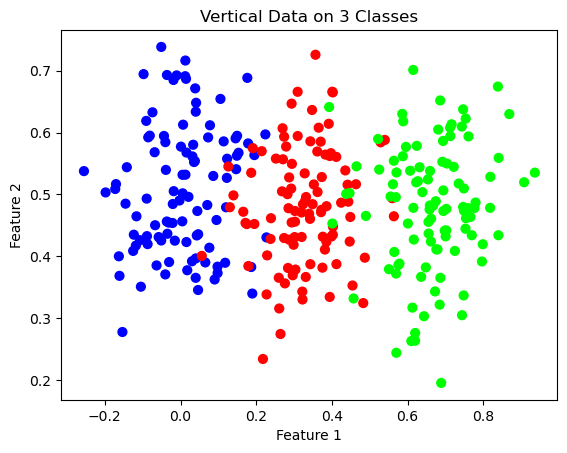

In [3]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.title('Vertical Data on 3 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
print("Type:", type(X), type(y))
print('Shape:')
print(X.shape, y.shape)

Type: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shape:
(300, 2) (300,)


In [5]:
X_torch = torch.tensor(X, dtype=torch.float32).cuda()
y_torch = torch.tensor(y, dtype=torch.float32).cuda()

In [6]:
Layer_Dense = nets.Layer_DenseTorch
activation = nets.ActivationFunctions(backend='torch')
loss_function = nets.categorical_cross_entropy_torch

In [7]:
dense1 = Layer_Dense(2, 3, activation=activation.relu)
dense2 = Layer_Dense(2, 3, activation=activation.relu)

In [8]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.clone()
best_dense1_biases = dense1.biases.clone()
best_dense2_weights = dense2.weights.clone()
best_dense2_biases = dense2.biases.clone()

In [10]:
# activation.relu()

In [16]:
np.random.randn(2, 3), torch.randn(2, 3)

(array([[ 1.3599485 , -0.09038201,  1.3675972 ],
        [ 1.0344099 , -0.99621266, -1.2179385 ]], dtype=float32),
 tensor([[ 1.0908e+00,  2.3605e-01, -1.4643e-01],
         [ 1.7278e+00, -1.8660e-04, -7.5644e-02]]))

In [ ]:
for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense1.weights = 0.05 * torch.randn(2, 3).cuda()
    dense1.biases = 0.05 * torch.randn(1, 3).cuda()
    dense2.weights = 0.05 * torch.randn(3, 3).cuda()
    dense2.biases = 0.05 * torch.randn(1, 3).cuda()
    # Perform a forward pass of the training data through this layer
    dense1.forward_prop(X_torch)
    dense2.forward_prop(dense1.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function(dense2.output, y)
    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(dense2.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

TypeError: clamp() received an invalid combination of arguments - got (numpy.ndarray, float, float), but expected one of:
 * (Tensor input, Tensor min, Tensor max, *, Tensor out)
 * (Tensor input, Number min, Number max, *, Tensor out)
